# Лабораторная работа №1 по предмету "Методы оптимизации"

Группа: РК6-63Б

Студент: Циплугин В. А.

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.optimize as scopt

In [2]:
#Чтение исходных данных
source_data = open("lab1.csv")
#amount получаем из числа строчек файла. Я не знаю, как можно красиво сделать этот момент в python
amount = 40
points = [0] * amount
i = 0

for data_string in source_data:
    points[i] = [0] * 2
    x_str, y_str = data_string.strip().split(' ')
    points[i][0] = float(x_str)
    points[i][1] = float(y_str)
    i += 1

points = sorted(points, key = lambda point: point[0])

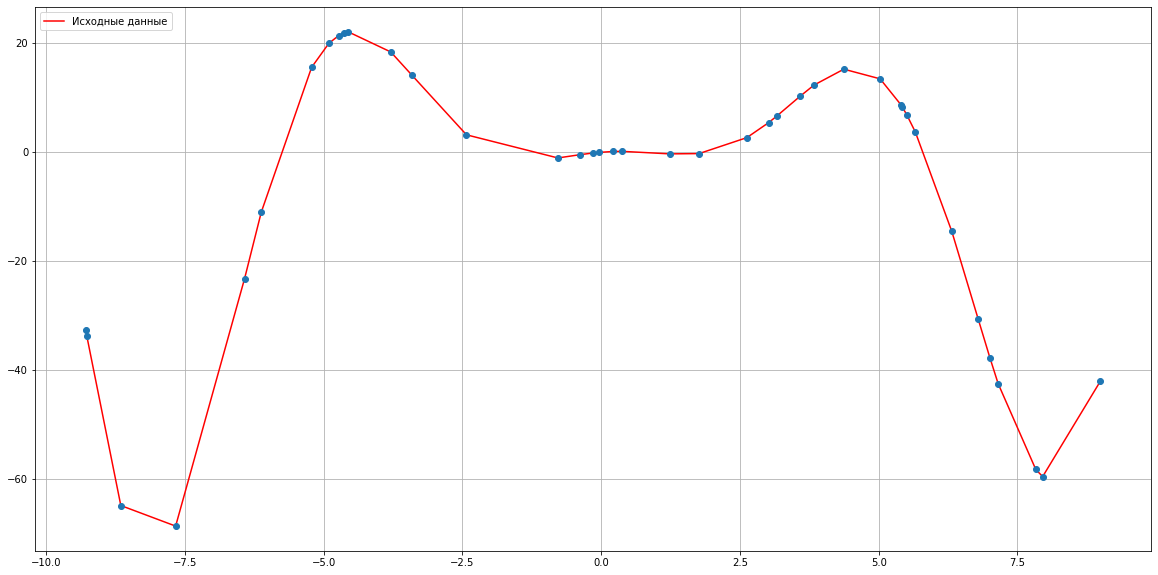

In [3]:
#Строим кусочно-линейную интерполяцию по заданным точкам
X = [0] * 40
Y = [0] * 40
for i in range(amount):
    X[i] = points[i][0]
    Y[i] = points[i][1]

fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(20, 10))
axis.plot(X, Y, 'red', label="Исходные данные")
axis.plot(X, Y, 'o')
axis.legend(loc='upper left')
axis.grid()
plt.show()

Введем функции определения максимального расстояния между имеющимися точками и аппромизацией и квадратичного отклонения, а также количество точек при постоении графика.

In [4]:
#Функция среднеквадратичного отклонения
def dos_dif(y_points, apro_y_points):
    result = 0
    for i in range(len(y_points)):
        result += (y_points[i] - apro_y_points[i]) ** 2
    result /= len(y_points)
    result = math.sqrt(result)
    return result

#Функция максимального отклонения
def max_dif(y_points, apro_y_points):
    max_dist = 0
    for i in range(len(y_points)):
        if (abs(y_points[i]-apro_y_points[i]) > max_dist):
            max_dist = abs(y_points[i]-apro_y_points[i])
    return max_dist

#Количество точек для построения графика
num_of_points = 200
#Точки для построения графика
x_array = np.linspace(points[0][0], points[amount - 1][0], num_of_points)

Изучив кусочно-линейную аппроксимацию графика можно сделать вывод, что функция приближенно четная. Также можно заметить, экстремумы симметрично располагаются относительно прямой x≈0.25. Если взять за основание, что заданные точки описываются произведением тригонометрической функции и полинома и изучить значение экстремумов, то можно сделать вывод полином имеет 2 или 3 степень. Также следует обратить внимание, что левые экстремумы больше по модулю, чем правые, что говорит о том, что требуется функция-корректор. С учетом четности следует вывод, что мы имеем дело с произведением полинома 2 степени и косинуса и корректирующей функцией в виде произведения другого полинома 2 степени на синус или произведением полинома 3 степени и синуса и корректирующей функцией в виде произведения другого полинома 3 степени на косинус. Обобщая данный вывод берем в качестве начальной функции следующую функцию:

Изучив кусочно-линейную аппроксимацию графика можно сделать вывод, что функция приближенно четная. Также можно заметить, экстремумы симметрично располагаются относительно прямой x≈0.25. Если взять за основание, что заданные точки описываются произведением тригонометрической функции и полинома и изучить значение экстремумов, то можно сделать вывод, что полином имеет 2 или 3 степень. Также следует обратить внимание, что левые экстремумы больше по модулю, чем правые, что говорит о том, что требуется функция-корректор. С учетом четности следует вывод, что мы имеем дело с произведением полинома 2 степени и косинуса и корректирующей функцией в виде произведения другого полинома 2 степени на синус или произведением полинома 3 степени и синуса и корректирующей функцией в виде произведения другого полинома 3 степени на косинус. Обобщая данный вывод берем в качестве начальной функции следующую функцию:

cos(a(x-z))(b(x^3)+c(x^2)+dx+f)+sin(g(x-z))(h(x^3)+l(x^2)+mx+n)

In [5]:
def apro(x, a, b, c, d, f, g, h, l, m, n, z):
    result = [0] * (len(x))
    for i in range(len(x)):
        result[i] = math.cos(a * (x[i] - z)) * (b * (x[i] ** 3) + c * (x[i] ** 2) + d * x[i] + f)
        result[i] += math.sin(g * (x[i] - z)) * (h * (x[i] ** 3) + l * (x[i] ** 2) + m * x[i] + n)
    return result
sol = scopt.curve_fit(apro, X, Y)[0]
print(sol)

[ 8.10021002e-01 -3.98929204e-05 -4.09053047e-01  3.28039895e-01
 -2.87578209e-07  8.10040796e-01 -8.59324162e-06  9.77875211e-01
 -7.84139678e-01 -2.96859530e-08  1.45002743e+00]


Можно заметить, что некоторые параметры крайне малы. А также их вклад в функцию крайне мал по сравнению с другими параметрами. Поэтому мы обнулим их.

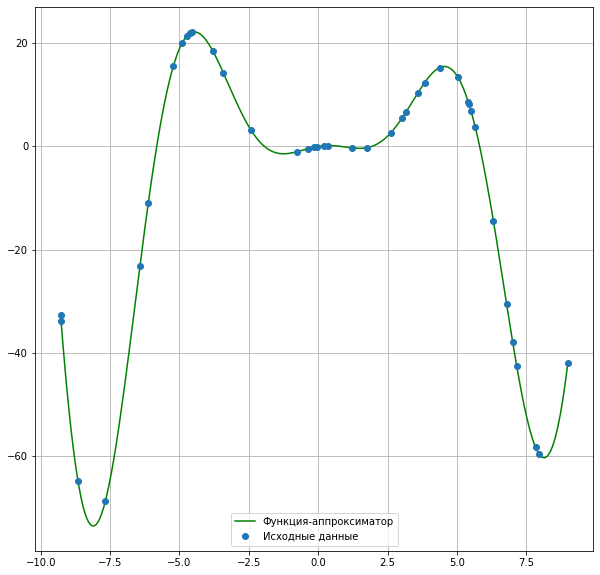

In [6]:
y_array = apro(x_array, sol[0], 0, sol[2], sol[3], 0, sol[5], 0, sol[7], sol[8], 0, sol[10])

fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
axis.plot(x_array, y_array, color = 'green', label ="Функция-аппроксиматор")
axis.plot(X, Y, 'o', label="Исходные данные")
axis.legend(loc='lower center')
axis.grid()
plt.show()

In [7]:
y_array_fin = apro(X, sol[0], 0, sol[2], sol[3], 0, sol[5], 0, sol[7], sol[8], 0, sol[10])

print("Среднеквадратичное отклонение равно {}".format(dos_dif(Y, y_array_fin)))
print("Максимальное отклонение равно {}".format(max_dif(Y, y_array_fin)))

Среднеквадратичное отклонение равно 0.009006240841857773
Максимальное отклонение равно 0.02833283567517242


Обнулим и исключим из функции-аппроксиматора те переменные, значимость которых оказалась крайне мала по итогам оптимизации по сравнению с остальными параметрами. Переходим ко второй итерации.

In [8]:
def apro2(x, a, c, d, g, l, m, z):
    result = [0] * (len(x))
    for i in range(len(x)):
        result[i] = math.cos(a*(x[i]-z))*(c*(x[i] ** 2)+d*x[i])
        result[i] += math.sin(g*(x[i]-z))*(l*(x[i] ** 2)+m*x[i])
    return result

sol2 = scopt.curve_fit(apro2, X, Y)[0]
print(sol2)

[ 9.58510514e-01  3.49608440e-09  1.70134604e-09  8.10000000e-01
  1.06000000e+00 -8.49999984e-01  1.93925473e+00]


Можно заметить, что некоторые параметры крайне малы. А также их вклад в функцию крайне мал по сравнению с другими параметрами. Поэтому мы обнулим их.

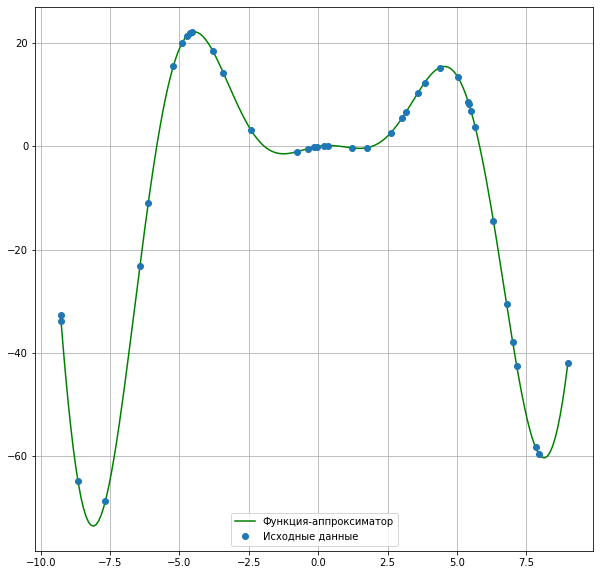

In [9]:
y_array2 = apro2(x_array, sol2[0], 0, 0, sol2[3], sol2[4], sol2[5], sol2[6])

fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
axis.plot(x_array, y_array2, color = 'green', label ="Функция-аппроксиматор")
axis.plot(X, Y, 'o', label="Исходные данные")
axis.legend(loc='lower center')
axis.grid()
plt.show()

In [10]:
y_array_fin2 = apro2(X, sol2[0], 0, 0, sol2[3], sol2[4], sol2[5], sol2[6])

print("Среднеквадратичное отклонение равно {}".format(dos_dif(Y, y_array_fin2)))
print("Максимальное отклонение равно {}".format(max_dif(Y, y_array_fin2)))

Среднеквадратичное отклонение равно 8.392109575900644e-08
Максимальное отклонение равно 3.030006681115083e-07


Обнулим и исключим из функции-аппроксиматора те переменные, значимость которых оказалась крайне мала по итогам оптимизации по сравнению с остальными параметрами. Переходим к третьей итерации.

Также полностью исключим косинус т.к. полином, на который он умножается обращается в нуль.

In [11]:
def apro3(x, g, l, m, z):
    result = [0] * (len(x))
    for i in range(len(x)):
        result[i] = math.sin(g*(x[i]-z))*(l*(x[i] ** 2)+m*x[i])
    return result


sol3 = scopt.curve_fit(apro3, X, Y)[0]
print(sol3)

[ 0.81        1.06       -0.85        1.93925472]


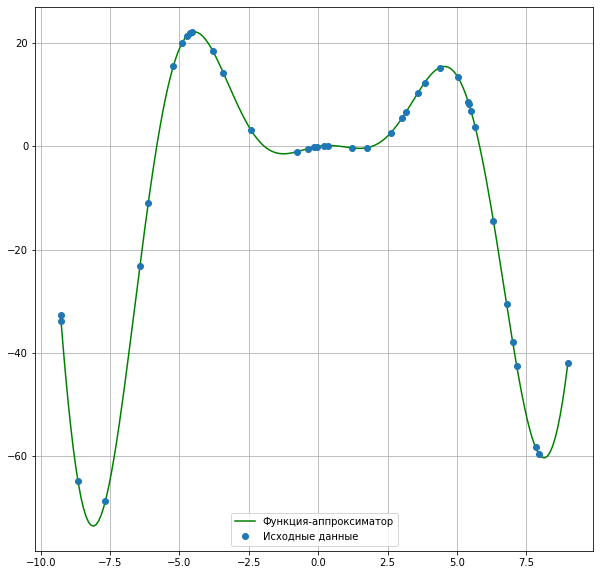

In [12]:
y_array3 = apro3(x_array, sol3[0], sol3[1], sol3[2], sol3[3])

fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
axis.plot(x_array, y_array3, color = 'green', label ="Функция-аппроксиматор")
axis.plot(X, Y, 'o', label="Исходные данные")
axis.legend(loc='lower center')
axis.grid()
plt.show()

In [13]:
y_array_fin3 = apro3(X, sol3[0], sol3[1], sol3[2], sol3[3])

print("Среднеквадратичное отклонение равно {}".format(dos_dif(Y, y_array_fin3)))
print("Максимальное отклонение равно {}".format(max_dif(Y, y_array_fin3)))

Среднеквадратичное отклонение равно 1.8156326946581306e-14
Максимальное отклонение равно 9.237055564881302e-14


Обратим внимание, что a * z = 1.57079633 - это половина Пи и по формуле приведения получим формулу: cos(0.81x)(-1.06(x^2)+0.85x)

Протестируем полученный результат.

In [14]:
def func(x):
    result = [0] * (len(x))
    for i in range(len(x)):
        result[i] = math.cos(0.81 * x[i]) * (-1.06 * (x[i] ** 2) + 0.85 * x[i])
    return result

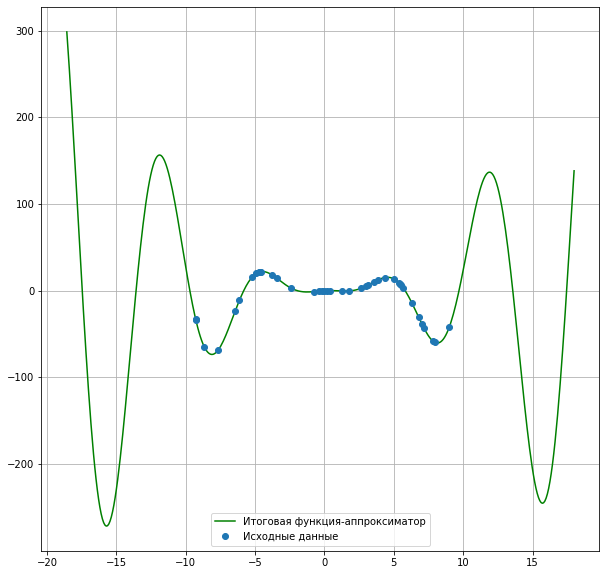

In [15]:
x_array_result = np.linspace(2 * points[0][0], 2*points[amount - 1][0], 2 * num_of_points)
y_array_result = func(x_array_result)

fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
axis.plot(x_array_result, y_array_result, color = 'green', label ="Итоговая функция-аппроксиматор")
axis.plot(X, Y, 'o', label="Исходные данные")
axis.legend(loc='lower center')
axis.grid()
plt.show()

In [16]:
y_array_func = func(X)

print("Среднеквадратичное отклонение равно {}".format(dos_dif(Y, y_array_func)))
print("Максимальное отклонение равно {}".format(max_dif(Y, y_array_func)))

Среднеквадратичное отклонение равно 2.5131290500938717e-15
Максимальное отклонение равно 1.4210854715202004e-14


Ура! Функция найдена! 

f(x) = cos(0.81x) * (-1.06(x^2)+0.85x)

Доп. задание: описание методики наилучшего аппроксиматора.

Для получения аппроксимации следует сначала изучить очевидные свойства: можно ли говорить о четности/нечетности, периодичности, неубывание/невозрастание. В случае четности/нечетности следует обратить на смещение относительно оси приближенной симметрии графика (в разбираемом выше случае ось симметрии пролегает при x ~ 0.2-0.5). При наличие периодичности функции можно говорить ою использовании каких-либо периодических функций, например, как самые очевидные - тригонометрические функции. Также при периодичности следует обратить внимание на изменение амплитуды, которое можно определить посредством изучения экстремумов. По результатам данного разбора следует создать функцию с избыточным количеством параметром. По мере оптимизации некоторые параметры дают крайне малый по сравнению с остальными параметрами вклад в функцию. Эти параметры следует обнулить и при следующей итерации изменить функцию (при умножении на нуль или при взятии синуса от нуля результат получается нулевым и не играет никакой роли, его можно вычеркивать из функции). По итогам итераций доходит до ситуации, когда дальнейшая оптимизация невозможна. Это и есть конечный результат. Этот вариант был использован выше.

Если полученный результат не удовлетворяет условиям, то следует использовать другие функции-аппроксимизаторы.

1)Например, можно попытаться получить полином по экстремумам. Полином получается на основании того, что производная функции обращается в нуль в экстремуме. Получаем полином степени N вида (x-x_ext1)(x-x_ext2)...(x-extN). Причем степень равна числу экстремумов. Итегрируем этот полином и умножаем его на параметр a и прибавляем к нему параметр b. Получаем полином вида: a(coef[N+1] * x^(N+1)+...+coef[1] * x) + b, где a, b - параметры, а массив coef[N+1,...,1] получается из результатов интегрирования.

2)Другой вариант получения аппроксимации - получения ряда Фурье. Подобный вариант дает два варианта получения результатов: получения коэффициентов для синусов и косинусов посредством интегрирования кусочно-линейной интерполяции. Для этого требуется нормализовать рассматриваем интервал [a, b] к интервалу [-Pi, Pi]. Этого можно достичь посредством преобразования вида xi_приведенное = (xi-center) * Pi/width, где xi - точка из числа рассматриваемых, center - середина интервала с границами в виде крайней левой и крайней правой точками, а width - ширина этого интервала. В качестве параметра берется свободный коэффициент из ряда Фурье. Получаем функцию вида:

f(x_приведенное) = SUM(coef_sin[i] * sin(i * x_приведенное) + coef_cos[i] * cos(i * x_приведенное)) + a, где a - параметр, а coef_sin и coef_cos - массивы коэффициентов, полученных при интегрировании, а i = 1,...,K, где K находится из условия наименьшего среднего квадратичного отклонения и предельной сложности функции.

3)Однако возможно использовать коэффициенты при синусах и косинусах в качестве параметров. Но в этом случае происходит сильное возрастание количества параметров.

Ниже рассмотрены все эти три варианта применительно к заданной функции

Начнем со случая полинома по экстремумам. list_of_coef - список коэффициентов при степенях, который был получен посредством интегрирования полинома, колученного по экстремумам. При этом были взяты приближенные значения экстремумов. Для упрощения расчетов были взяты полуцелые значения.

In [17]:
list_of_coef = [0.125,-1/7,-90.25/6,11.3,(1569+(15/16))/4,(-810+(-9/16))/3,(-3086+(-55/64))/2,1549.125]

def polinom(x, a, b):
    result = [0] * len(x)
    for i in range(len(x)):
        result[i] = 0
        for j in range(8):
            result[i] += list_of_coef[7 - j] * (x[i] ** (j + 1))
        result[i] *= a
        result[i] += b
    return result

sol_pol = scopt.curve_fit(polinom, X, Y)[0]
print(sol_pol)

[ 1.10800902e-04 -3.23870546e+00]


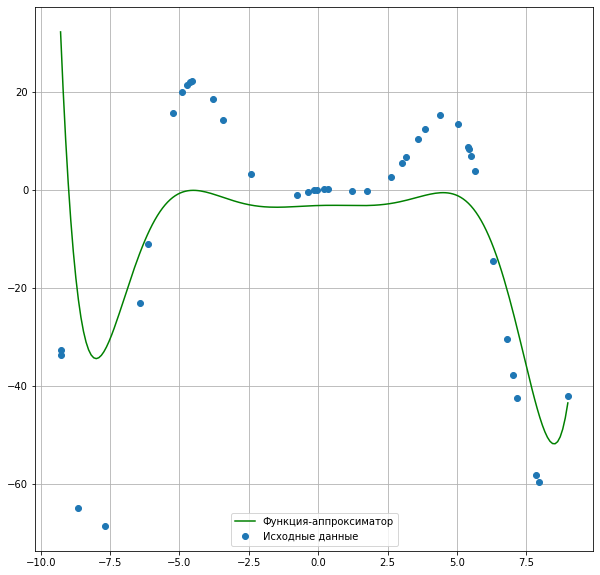

In [18]:
y_polinom = polinom(x_array, sol_pol[0], sol_pol[1])

fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
axis.plot(x_array, y_polinom, color = 'green', label ="Функция-аппроксиматор")
axis.plot(X, Y, 'o', label="Исходные данные")
axis.legend(loc='lower center')
axis.grid()
plt.show()

In [19]:
y_array_polinom = polinom(X, sol_pol[0], sol_pol[1])

print("Среднеквадратичное отклонение равно {}".format(dos_dif(Y, y_array_polinom)))
print("Максимальное отклонение равно {}".format(max_dif(Y, y_array_polinom)))

Среднеквадратичное отклонение равно 20.4539508876545
Максимальное отклонение равно 64.8295141599614


Как видно данный метод слабо применим к этой ситуации. Хотя в других ситуациях есть возможность его применения. 

Перейдем к рассмотрению случая с рядом Фурье. Для этого сначала находим список коэффициентов

In [20]:
center = (points[0][0] + points[amount - 1][0]) / 2
width = (points[amount - 1][0] - points[0][0]) / 2

def to_pi(x):
    x_to_pi = [0] * len(x)
    for i in range(len(x)):
        x_to_pi[i] = (x[i] - center) * math.pi / width
    return x_to_pi

X_pi = to_pi(X)

In [21]:
max_pow = 40
first = 0
last = 39
coef_sin = [0] * max_pow
coef_cos = [0] * max_pow

for i in range(0, max_pow):
    coef_sin[i] = 0
    coef_cos[i] = 0
    m = i + 1
    for j in range(first, last):
        adder = 1;
        adder *= (Y[j]*math.sin(m*X_pi[j])+Y[j+1]*math.sin(m*X_pi[j+1]))
        adder *= (X_pi[j+1] - X_pi[j]) / 2
        coef_sin[i] += adder
        adder = 1;
        adder *= (Y[j]*math.cos(m*X_pi[j])+Y[j+1]*math.cos(m*X_pi[j+1]))
        adder *= (X_pi[j+1] - X_pi[j]) / 2
        coef_cos[i] += adder
    coef_sin[i] /= math.pi
    coef_cos[i] /= math.pi

После нахождения коэффициентов до 40-го включительно переходим к нахождению оптимального количества слагаемых синусов и косинусов, а также оптимального коэффициента.

В конце кода строим график для оптимального количества слогаемых синусов и косинусов.

Оптимальное количество слагаемых синусов и косинусов равно 9


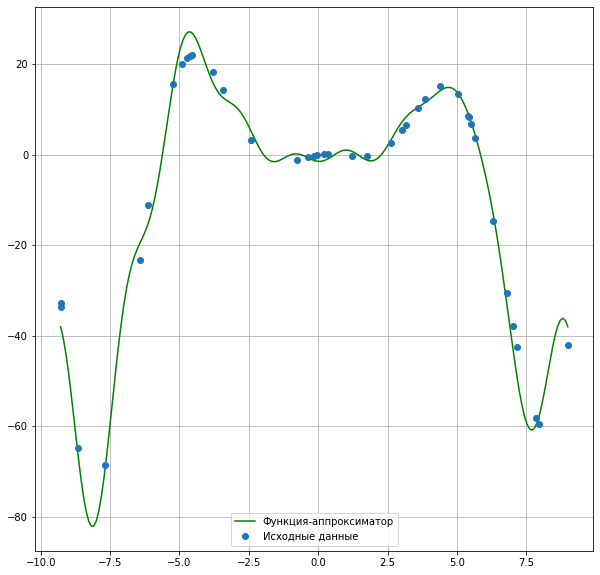

In [22]:
furie_pow = 9

def func_furie(x, a):
    result = [0] * len(x)
    for i in range(len(x)):
        result[i] = 0
        t = (x[i] - center) * math.pi / width
        for j in range(furie_pow):
            result[i] += coef_sin[j] * math.sin((j + 1) * t)
            result[i] += coef_cos[j] * math.cos((j + 1) * t)
        result[i] += a
    return result

opt_max_pow = 1
min_dos = 100000
for i in range(opt_max_pow, max_pow):
    furie_pow = i
    sol_furie = scopt.curve_fit(func_furie, X, Y)[0]
    y_array_f = func_furie(X, sol_furie[0])
    dos = dos_dif(Y, y_array_f)
    if (dos < min_dos):
        min_dos = dos
        opt_max_pow = i

furie_pow = opt_max_pow
print("Оптимальное количество слагаемых синусов и косинусов равно {}".format(opt_max_pow))
sol_furie = scopt.curve_fit(func_furie, X, Y)[0]

y_array_furie = func_furie(x_array, sol_furie[0])

fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
axis.plot(x_array, func_furie(x_array, sol_furie[0]), color = 'green', label ="Функция-аппроксиматор")
axis.plot(X, Y, 'o', label="Исходные данные")
axis.legend(loc='lower center')
axis.grid()
plt.show()

In [23]:
y_array_f = func_furie(X, sol_furie[0])

print("Среднеквадратичное отклонение равно {}".format(dos_dif(Y, y_array_f)))
print("Максимальное отклонение равно {}".format(max_dif(Y, y_array_f)))

Среднеквадратичное отклонение равно 2.7668726876257135
Максимальное отклонение равно 6.0985898901179425


По итогам получаем, что оптимальным является 9 слагаемых синусов и косинусов плюс свободный коэффициентов. По итогам получаем довольно сложную функцию с умеренной точностью.

Перейдем к рассмотрению второго случая с рядом Фурье, но с большей степенью параметризации. Возьмем полученное ранее число слагаемых синусов и косинусов. 

In [24]:
def apro_f_p(x, s1, s2, s3, s4, s5, s6, s7, s8, s9, c1, c2, c3, c4, c5, c6, c7, c8, c9, a):
    result = [0] * (len(x))
    for i in range(len(x)):
        t = (x[i] - center) * math.pi / width
        result[i] = s1*math.sin(t)+s2*math.sin(2*t)+s3*math.sin(3*t)
        result[i] += s4*math.sin(4*t)+s5*math.sin(5*t)+s6*math.sin(6*t)
        result[i] += s7*math.sin(7*t)+s8*math.sin(8*t)+s9*math.sin(9*t)
        result[i] += c1*math.cos(t)+c2*math.cos(2*t)+c3*math.cos(3*t)
        result[i] += c4*math.cos(4*t)+c5*math.cos(5*t)+c6*math.cos(6*t)
        result[i] += c7*math.cos(7*t)+c8*math.cos(8*t)+c9*math.cos(9*t)+a
    return result

s = scopt.curve_fit(apro_f_p, X, Y)[0]
print(s)

[  1.51988184  -4.96855181   4.32889338   0.39732544   1.51544902
  -1.18152536   0.9265334   -1.13211055  -0.5020691   27.16721872
 -23.92621935   2.3579598    7.86312081  -4.91101403   4.98491484
  -3.50282282   3.57749021  -2.90742651 -11.11370103]


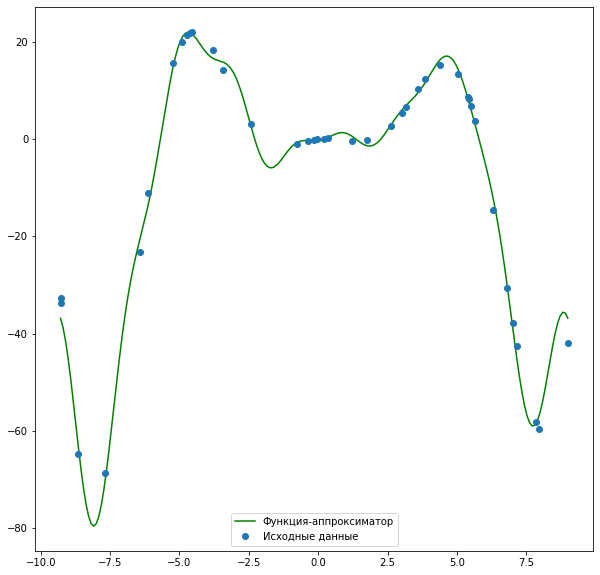

In [25]:
x_f=np.linspace(points[0][0], points[amount - 1][0], num_of_points)
y_f=apro_f_p(x_f,s[0],s[1],s[2],s[3],s[4],s[5],s[6],s[7],s[8],s[9],s[10],s[11],s[12],s[13],s[14],s[15],s[16],s[17],s[18])

fig, axis = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
axis.plot(x_f, y_f, color = 'green', label ="Функция-аппроксиматор")
axis.plot(X, Y, 'o', label="Исходные данные")
axis.legend(loc='lower center')
plt.show()

In [26]:
y_a_fin=apro_f_p(X,s[0],s[1],s[2],s[3],s[4],s[5],s[6],s[7],s[8],s[9],s[10],s[11],s[12],s[13],s[14],s[15],s[16],s[17],s[18])

print("Среднеквадратичное отклонение равно {}".format(dos_dif(Y, y_a_fin)))
print("Максимальное отклонение равно {}".format(max_dif(Y, y_a_fin)))

Среднеквадратичное отклонение равно 1.64817154830083
Максимальное отклонение равно 5.182318528924945


По итогам получаем более высокую точность при одинаковой сложности функции по сравнению с первым вариантом использования ряда Фурье.